# ¡Hola Daniel! 😊

Mi nombre es **Alejandro Castellanos** y hoy tengo el placer de ser el revisor de tu proyecto.

Voy a revisar todo tu código con detalle, buscando tanto los puntos fuertes como aquellos en los que podrías mejorar. Te dejaré comentarios a lo largo del notebook, destacando lo que has hecho bien y sugiriendo ajustes donde sea necesario. Si encuentro algún error, no te preocupes, te lo haré saber de forma clara y te daré información útil para que puedas corregirlo en la próxima iteración. Si en algún punto tienes comentarios, siéntete libre de dejarlos también.


Encontrarás mis comentarios específicos dentro de cajas verdes, amarillas o rojas, es muy importante que no muevas, modifiques o borres mis comentarios, con el fin de tener un seguimiento adecuado de tu proceso:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

A continuación te dejaré un comentario general con mi valoración del proyecto. **¡Mi objetivo es que sigas aprendiendo y mejorando con cada paso!**



----

<div class="alert alert-block alert-success">
<b>Comentario General del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Daniel has realizado un trabajo exhaustivo y bien estructurado, abordando cada objetivo con metodología clara y reflexiones pertinentes. 

En la exploración inicial, identificaste datos limpios pero con observaciones relevantes. En la implementación de kNN, destacaste correctamente el impacto del escalado y el tipo de distancia en el rendimiento del modelo, validando su importancia práctica. 

Al transformar el problema a clasificación, lograste contrastar efectivamente el modelo kNN con un enfoque básico, reforzando la superioridad del primero con datos escalados. Aplicación de métricas de evaluación como RMSE, R² y el F1 score para validar la calidad de tus modelos refleja un rigor sobresaliente. Además aplicaste de manera correcta las operaciones algebraicas para transformar los datos y lograr hacer una comparativa en el rendimiento de la información original vs los datos ofuscados.
    
El análisis que incluiste en las diferentes secciones del proyecto le da valor a tu trabajo, y complementa notablemente tus habiliadades técnicas. Asegurate de incluir este tipo de análisis para cada elemento de información (tabla, gráficas, etc) que obtengas, de esta forma tus ideas y conclusiones estarán mejor justificadas. 

¡Continúa por este camino y te deseo mucho éxito en tu próximo Sprint! 🚀
 
*Estado del Proyecto*: **Aprobado**

</div>

-----

# Descripción

La compañía de seguros Sure Tomorrow quiere resolver varias tareas con la ayuda de machine learning y te pide que evalúes esa posibilidad.
- Tarea 1: encontrar clientes que sean similares a un cliente determinado. Esto ayudará a los agentes de la compañía con el marketing.
- Tarea 2: predecir la probabilidad de que un nuevo cliente reciba una prestación del seguro. ¿Puede un modelo de predictivo funcionar mejor que un modelo dummy?
- Tarea 3: predecir el número de prestaciones de seguro que un nuevo cliente pueda recibir utilizando un modelo de regresión lineal.
- Tarea 4: proteger los datos personales de los clientes sin afectar al modelo del ejercicio anterior. Es necesario desarrollar un algoritmo de transformación de datos que dificulte la recuperación de la información personal si los datos caen en manos equivocadas. Esto se denomina enmascaramiento u ofuscación de datos. Pero los datos deben protegerse de tal manera que no se vea afectada la calidad de los modelos de machine learning. No es necesario elegir el mejor modelo, basta con demostrar que el algoritmo funciona correctamente.


# Preprocesamiento y exploración de datos

## Inicialización

## Carga de datos

Carga los datos y haz una revisión básica para comprobar que no hay problemas obvios.

In [1]:
%pip install scikit-learn --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 218.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
ERROR: Could not install packages due to an OSError: [Errno 13] Permission denied: '/.venv/lib/python3.9/site-packages/scikit_learn-0.24.1.dist-info/'
Check the permissions.

Note: you may need to restart the kernel to use updated packages.


In [2]:
#Cargar todas las librerías
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics
import sklearn.linear_model
import sklearn.neighbors
import sklearn.preprocessing
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv('/datasets/insurance_us.csv')

Renombramos las columnas para que el código se vea más coherente con su estilo.

In [4]:
df = df.rename(columns={'Gender': 'gender', 'Age': 'age', 'Salary': 'income', 'Family members': 'family_members', 'Insurance benefits': 'insurance_benefits'})

In [5]:
df.sample(10)

,gender,age,income,family_members,insurance_benefits
2341,1,19.0,36400.0,3,0
3905,0,29.0,42900.0,1,0
4972,1,25.0,29000.0,1,0
3430,0,33.0,33100.0,0,0
2745,0,22.0,34600.0,0,0
29,0,21.0,42200.0,2,0
1948,0,27.0,37100.0,1,0
2220,0,23.0,34300.0,1,0
4091,1,27.0,34600.0,0,0
1982,0,27.0,48700.0,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   float64
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [7]:
# Convertir age de decimal a entero.

df['age'] = df['age'].astype(int)

In [8]:
# comprueba que la conversión se haya realizado con éxito

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   int64  
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 195.4 KB


In [9]:
# ahora echa un vistazo a las estadísticas descriptivas de los datos.# ¿Se ve todo bien?

print(df.describe())

            gender          age        income  family_members  \
count  5000.000000  5000.000000   5000.000000     5000.000000   
mean      0.499000    30.952800  39916.360000        1.194200   
std       0.500049     8.440807   9900.083569        1.091387   
min       0.000000    18.000000   5300.000000        0.000000   
25%       0.000000    24.000000  33300.000000        0.000000   
50%       0.000000    30.000000  40200.000000        1.000000   
75%       1.000000    37.000000  46600.000000        2.000000   
max       1.000000    65.000000  79000.000000        6.000000   

       insurance_benefits  
count         5000.000000  
mean             0.148000  
std              0.463183  
min              0.000000  
25%              0.000000  
50%              0.000000  
75%              0.000000  
max              5.000000  


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Daniel muy buen trabajo importando las librerías y los datos del proyecto. Adicionalmente usaste correctamente las funciones `info`, `describe` y `head`, esto te permite hacer una primera revisión de los datos, su estructura y contenido. 

Además ajustaste correctamente los nombres de las columnas, esto permitirá un manejo fácil de los datos

</div>

## Análisis exploratorio de datos

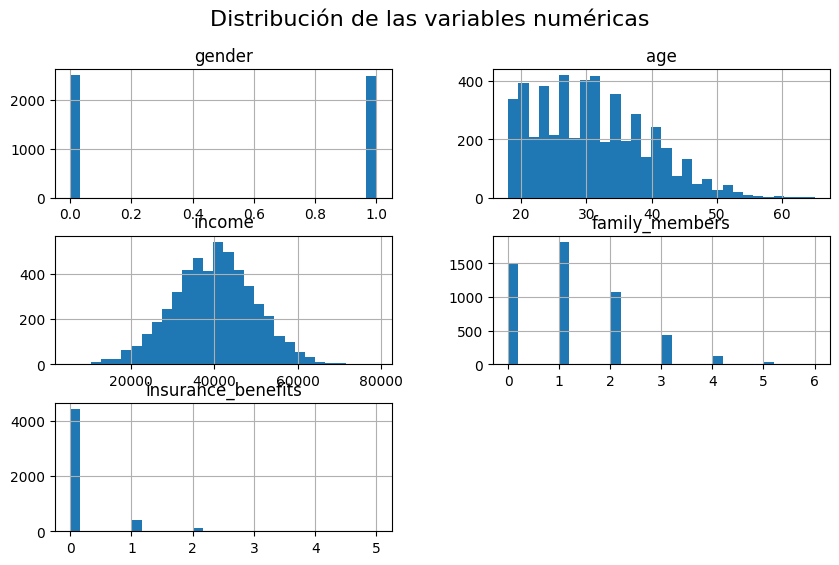

In [10]:
# Histogramas para visualizar distribución de variables numéricas
df.hist(figsize=(10, 6), bins=30)
plt.suptitle("Distribución de las variables numéricas", fontsize=16)
plt.show()

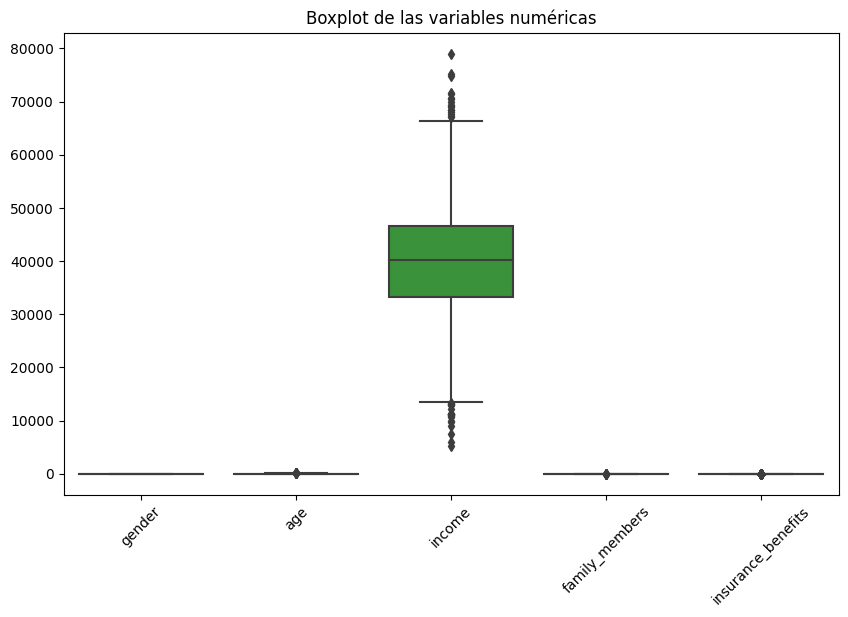

In [11]:
# Boxplots para detectar valores atípicos
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title("Boxplot de las variables numéricas")
plt.xticks(rotation=45)
plt.show()

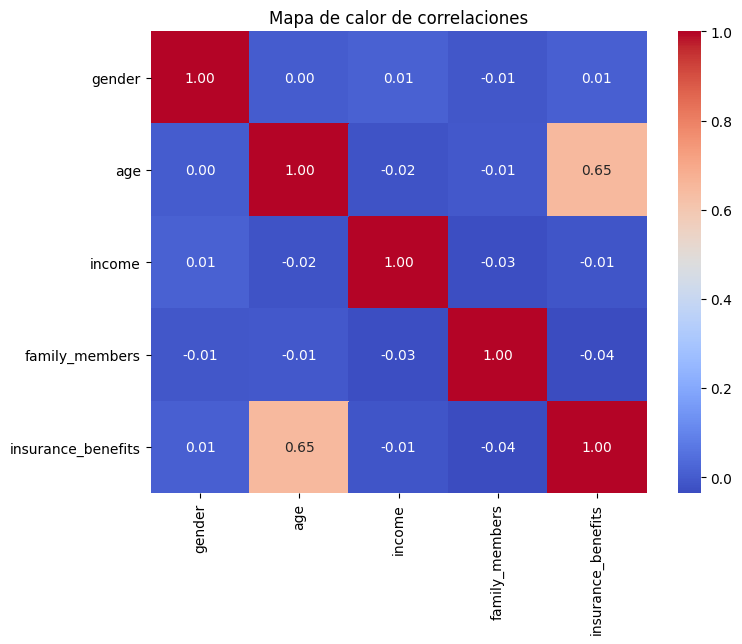

In [12]:
# Heatmap de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de calor de correlaciones")
plt.show()

**Conclusiones del análisis exploratorio (EDA):**

1. Histogramas:
- age tiene una distribución normal centrada alrededor de los 39 años, con un rango de 18 a 65 años.
- income muestra una distribución sesgada a la derecha, indicando que la mayoría de los clientes tienen ingresos bajos, pero hay algunos valores altos.
- insurance_benefits está fuertemente sesgado hacia 0, lo que indica que la mayoría de los clientes no reciben beneficios, lo que podría afectar la predicción.

2. Boxplot:
- income tiene algunos valores atípicos, lo que sugiere la necesidad de una transformación como log-transform para reducir el impacto del sesgo.
- insurance_benefits tiene una concentración alta en 0, pero con algunos clientes que reciben hasta 5 beneficios, lo que indica una posible segmentación en el dataset.
- family_members tiene una distribución esperada con algunos valores altos (hasta 6), pero sin mostrar outliers extremos.

3. Heatmap (correlaciones):
- age tiene una correlación fuerte con insurance_benefits, lo que indica que la edad es un predictor clave en los beneficios de seguro.
- income tiene una correlación moderada con insurance_benefits, por lo que podría ayudar en la predicción, pero no de manera determinante.
- family_members no parece influir fuertemente en la cantidad de beneficios de seguro.


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Tu análisis exploratorio revela una buena comprensión de las relaciones entre las variables y su comportamiento individual. Has identificado correctamente patrones relevantes como la normalidad de la edad y el sesgo en los ingresos y beneficios, interpretando cómo estas características pueden influir en modelos predictivos. También resulta acertada tu observación sobre la correlación entre edad y beneficios, lo cual puede orientar decisiones analíticas más precisas.

</div>

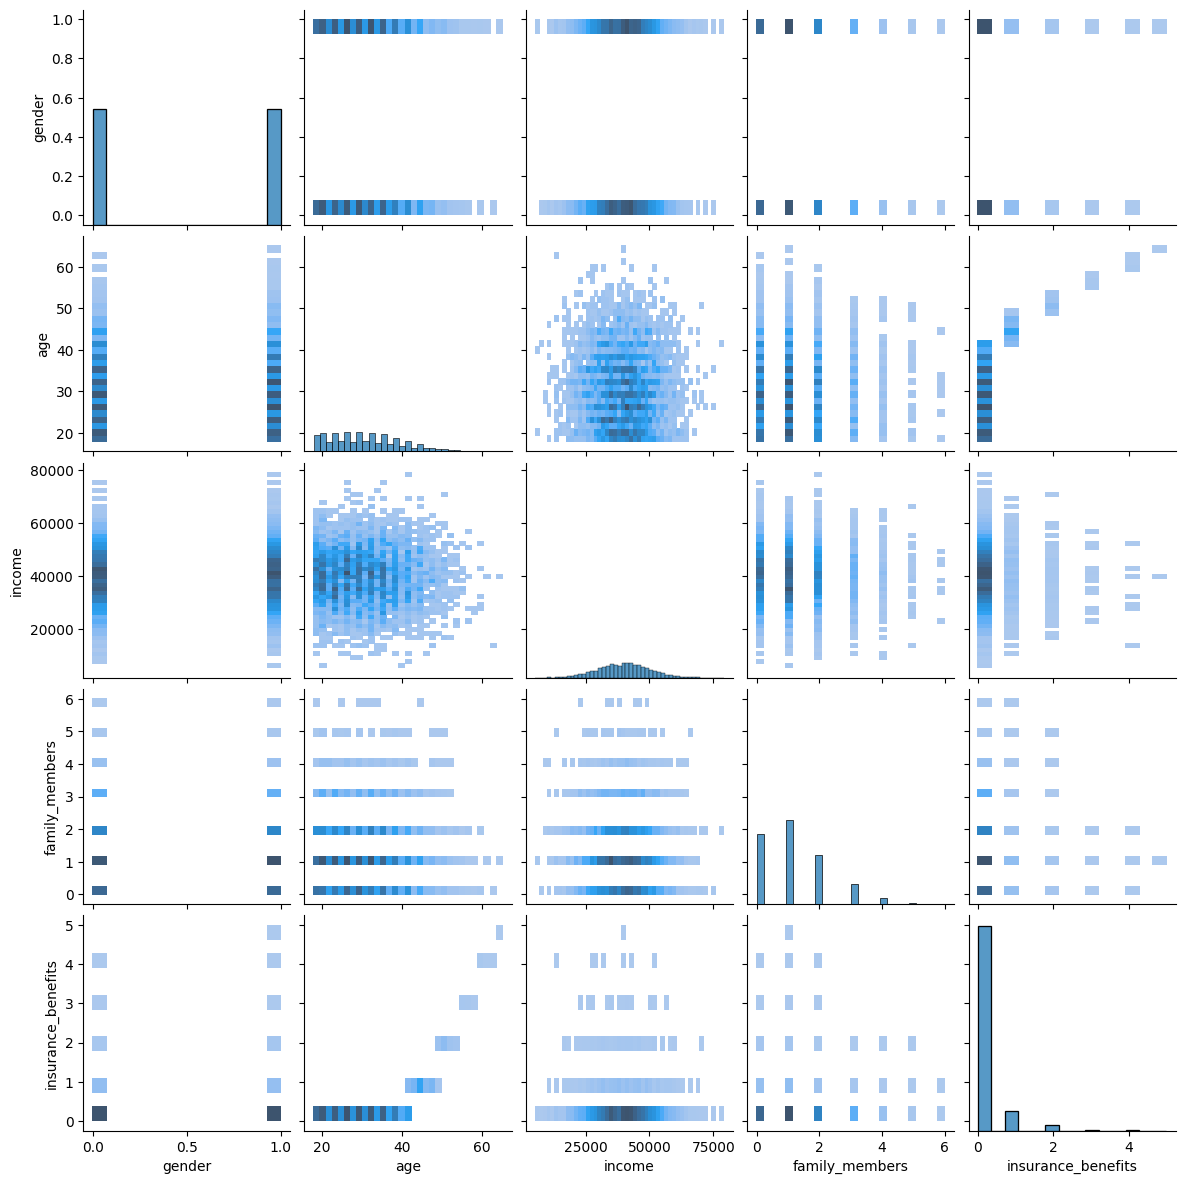

In [13]:
#Pairplots.

g = sns.pairplot(df, kind='hist')
g.fig.set_size_inches(12, 12)

De acuerdo, es un poco complicado detectar grupos obvios (clústeres) ya que es difícil combinar diversas variables simultáneamente (para analizar distribuciones multivariadas). Ahí es donde LA y ML pueden ser bastante útiles.

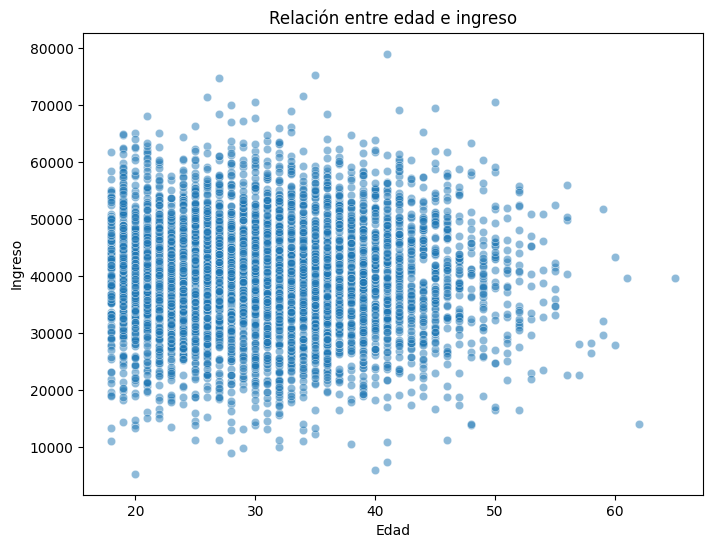

In [14]:
# Gráfico de dispersión: edad vs ingreso
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['age'], y=df['income'], alpha=0.5)
plt.title("Relación entre edad e ingreso")
plt.xlabel("Edad")
plt.ylabel("Ingreso")
plt.show()

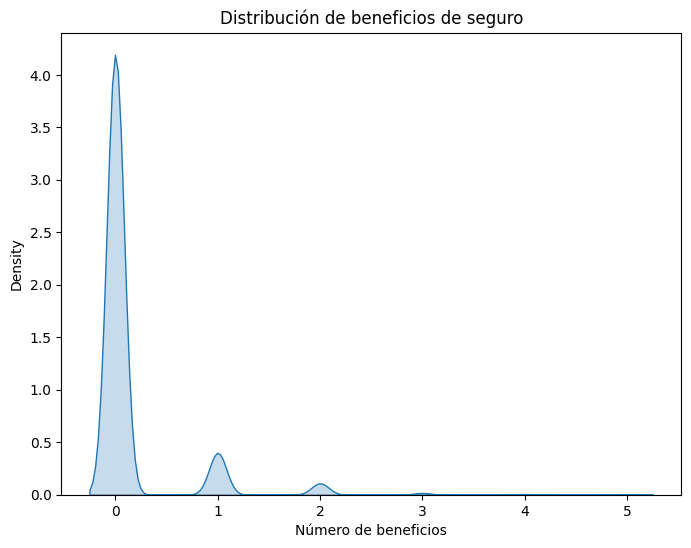

In [15]:
# Gráfico KDE para la densidad de beneficios de seguro
plt.figure(figsize=(8, 6))
sns.kdeplot(df['insurance_benefits'], fill=True)
plt.title("Distribución de beneficios de seguro")
plt.xlabel("Número de beneficios")
plt.show()

In [16]:
# Análisis de percentiles para identificar valores extremos
print(df.describe(percentiles=[0.01, 0.99]))

            gender          age        income  family_members  \
count  5000.000000  5000.000000   5000.000000     5000.000000   
mean      0.499000    30.952800  39916.360000        1.194200   
std       0.500049     8.440807   9900.083569        1.091387   
min       0.000000    18.000000   5300.000000        0.000000   
1%        0.000000    18.000000  16599.000000        0.000000   
50%       0.000000    30.000000  40200.000000        1.000000   
99%       1.000000    52.000000  62301.000000        4.000000   
max       1.000000    65.000000  79000.000000        6.000000   

       insurance_benefits  
count         5000.000000  
mean             0.148000  
std              0.463183  
min              0.000000  
1%               0.000000  
50%              0.000000  
99%              2.000000  
max              5.000000  


**Conclusiones sobre los datos:**
1. No faltan datos → Todas las columnas tienen sus 5000 registros completos.
2. Valores atípicos en income → Algunos salarios son excepcionalmente altos.
3. Fuerte sesgo en insurance_benefits → La mayoría de los clientes no recibe beneficios, lo que podría afectar la predicción.
4. La edad (age) es el predictor más relevante, con alta correlación con insurance_benefits, lo que será clave para los modelos.


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Buen trabajo Daniel, la observación sobre el fuerte sesgo en los beneficios y su posible efecto en los modelos muestra una buena anticipación de desafíos analíticos. Asimismo, reconocer la relevancia de la edad como variable clave denota una lectura precisa de las correlaciones.

</div>

# Tarea 1. Clientes similares

En el lenguaje de ML, es necesario desarrollar un procedimiento que devuelva los k vecinos más cercanos (objetos) para un objeto dado basándose en la distancia entre los objetos.
Es posible que quieras revisar las siguientes lecciones (capítulo -> lección)- Distancia entre vectores -> Distancia euclidiana
- Distancia entre vectores -> Distancia Manhattan

Para resolver la tarea, podemos probar diferentes métricas de distancia.

Escribe una función que devuelva los k vecinos más cercanos para un $n^{th}$ objeto basándose en una métrica de distancia especificada. A la hora de realizar esta tarea no debe tenerse en cuenta el número de prestaciones de seguro recibidas.
Puedes utilizar una implementación ya existente del algoritmo kNN de scikit-learn (consulta [el enlace](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors)) o tu propia implementación.
Pruébalo para cuatro combinaciones de dos casos- Escalado
  - los datos no están escalados
  - los datos se escalan con el escalador [MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html)
- Métricas de distancia
  - Euclidiana
  - Manhattan

Responde a estas preguntas:- ¿El hecho de que los datos no estén escalados afecta al algoritmo kNN? Si es así, ¿cómo se manifiesta?- ¿Qué tan similares son los resultados al utilizar la métrica de distancia Manhattan (independientemente del escalado)?

In [17]:
feature_names = ['gender', 'age', 'income', 'family_members']

In [18]:
def get_knn(df, n, k, metric):
    """
    Devuelve los k vecinos más cercanos

    :param df: DataFrame de pandas utilizado para encontrar objetos similares dentro del mismo lugar
    :param n: índice del objeto para el cual se buscan vecinos
    :param k: número de vecinos más cercanos a devolver
    :param metric: métrica de distancia ('euclidean' o 'manhattan')
    """

    # Inicializar el modelo KNN con la métrica seleccionada
    nbrs = NearestNeighbors(n_neighbors=k, metric=metric)

    # Ajustar el modelo con las características relevantes (excluyendo 'insurance_benefits')
    nbrs.fit(df[feature_names])  # ¡Este paso es crucial!

    # Obtener vecinos más cercanos del objeto en la posición 'n'
    nbrs_distances, nbrs_indices = nbrs.kneighbors([df.iloc[n][feature_names]])

    # Crear DataFrame con los vecinos y sus respectivas distancias
    df_res = pd.concat([
        df.iloc[nbrs_indices[0]],
        pd.DataFrame(nbrs_distances.T, index=nbrs_indices[0], columns=['distance'])
    ], axis=1)

    return df_res

In [19]:
# Probar KNN sin escalado (datos originales)
n_test = 100  # Índice de prueba
k_neighbors = 5  # Número de vecinos más cercanos
metric_type = 'euclidean'  # Métrica de distancia

df_knn_no_scaling = get_knn(df, n_test, k_neighbors, metric_type)
display(df_knn_no_scaling)

,gender,age,income,family_members,insurance_benefits,distance
100,0,19,37300.0,1,0,0.000000
2624,1,19,37300.0,0,0,1.414214
1831,0,20,37300.0,2,0,1.414214
4278,1,19,37300.0,2,0,1.414214
1086,0,22,37300.0,3,0,3.605551


Escalar datos.

In [20]:
feature_names = ['gender', 'age', 'income', 'family_members']

transformer_mas = sklearn.preprocessing.MaxAbsScaler().fit(df[feature_names].to_numpy())

df_scaled = df.copy()
df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())

In [21]:
df_scaled.sample(5)

,gender,age,income,family_members,insurance_benefits
4889,1.0,0.307692,0.526582,0.166667,0
2180,0.0,0.600000,0.648101,0.333333,0
1572,1.0,0.415385,0.772152,0.166667,0
3900,1.0,0.553846,0.627848,0.000000,0
132,1.0,0.507692,0.425316,0.500000,0


Ahora, vamos a obtener registros similares para uno determinado, para cada combinación

In [22]:
# Parámetros de prueba
n_test = 100  # Índice del cliente seleccionado
k_neighbors = 5  # Número de vecinos más cercanos

# Sin escalado - Euclidiana
df_knn_no_scaling_euclidean = get_knn(df, n_test, k_neighbors, 'euclidean')
display(df_knn_no_scaling_euclidean)

# Sin escalado - Manhattan
df_knn_no_scaling_manhattan = get_knn(df, n_test, k_neighbors, 'manhattan')
display(df_knn_no_scaling_manhattan)

# Con escalado - Euclidiana
df_knn_scaled_euclidean = get_knn(df_scaled, n_test, k_neighbors, 'euclidean')
display(df_knn_scaled_euclidean)

# Con escalado - Manhattan
df_knn_scaled_manhattan = get_knn(df_scaled, n_test, k_neighbors, 'manhattan')
display(df_knn_scaled_manhattan)

,gender,age,income,family_members,insurance_benefits,distance
100,0,19,37300.0,1,0,0.000000
2624,1,19,37300.0,0,0,1.414214
1831,0,20,37300.0,2,0,1.414214
4278,1,19,37300.0,2,0,1.414214
1086,0,22,37300.0,3,0,3.605551


,gender,age,income,family_members,insurance_benefits,distance
100,0,19,37300.0,1,0,0.0
4278,1,19,37300.0,2,0,2.0
1831,0,20,37300.0,2,0,2.0
2624,1,19,37300.0,0,0,2.0
1086,0,22,37300.0,3,0,5.0


,gender,age,income,family_members,insurance_benefits,distance
100,0.0,0.292308,0.472152,0.166667,0,0.000000
4915,0.0,0.292308,0.477215,0.166667,0,0.005063
243,0.0,0.292308,0.467089,0.166667,0,0.005063
1323,0.0,0.292308,0.456962,0.166667,0,0.015190
811,0.0,0.307692,0.470886,0.166667,0,0.015437


,gender,age,income,family_members,insurance_benefits,distance
100,0.0,0.292308,0.472152,0.166667,0,0.000000
4915,0.0,0.292308,0.477215,0.166667,0,0.005063
243,0.0,0.292308,0.467089,0.166667,0,0.005063
1323,0.0,0.292308,0.456962,0.166667,0,0.015190
811,0.0,0.307692,0.470886,0.166667,0,0.016650


**Conclusiones clave:**

1. El escalado sí afecta KNN, ya que sin él, ciertas variables dominan la cercanía entre clientes.
2. La métrica Manhattan parece generar distancias más uniformes, lo que puede ser útil en datasets con distribuciones desiguales.

Respuestas a las preguntas

**¿El hecho de que los datos no estén escalados afecta al algoritmo kNN? Si es así, ¿cómo se manifiesta?** 

Sí, el hecho de que los datos no estén escalados afecta al algoritmo kNN, y se manifiesta de la siguiente manera:

1. Influencia desproporcionada de ciertas variables → En datasets donde las características tienen magnitudes muy diferentes (por ejemplo, income puede estar en miles mientras que gender es binario 0/1), las variables con valores más grandes dominarán el cálculo de distancia. Esto hace que el algoritmo KNN priorice la proximidad basada en estas variables, ignorando parcialmente las demás.

2. Distorsión en la medición de distancia → KNN se basa en cálculos de distancia como Euclidiana (raíz cuadrada de la suma de las diferencias al cuadrado) o Manhattan (suma de diferencias absolutas). Si una variable tiene una escala mucho mayor, afectará significativamente la distancia total, distorsionando la cercanía entre puntos.

3. Vecinos menos representativos → Al no escalar los datos, los vecinos seleccionados pueden no ser los más similares en términos de características esenciales, sino simplemente aquellos con valores numéricos cercanos en variables de gran magnitud. Esto puede hacer que el modelo no identifique correctamente segmentos de clientes.


**¿Qué tan similares son los resultados al utilizar la métrica de distancia Manhattan (independientemente del escalado)?** 

**Comparación de la métrica Manhattan frente a Euclidiana:**

1. La métrica Manhattan genera resultados generalmente más uniformes al calcular distancia como la suma de diferencias absolutas en cada característica, evita que variables con rangos grandes influyan demasiado.
2. Los vecinos más cercanos en Manhattan tienden a ser más diversos, como no involucra raíz cuadrada (como Euclidiana), las diferencias en cada característica se suman directamente, lo que da más peso a variaciones pequeñas.
3. Si los datos no están escalados, las diferencias se reflejan más en Euclidiana → Como Euclidiana involucra sumas al cuadrado, las variaciones en magnitudes mayores afectan más la distancia final.

**Conclusión clave:**

1. Si queremos que todas las características influyan de manera pareja, Manhattan es mejor.
2. Si buscamos enfatizar similitudes en características con valores grandes, Euclidiana puede ser más útil.
3. Independientemente del escalado, la métrica Manhattan tiende a producir distancias más uniformes, lo que puede mejorar la representación de vecinos cercanos en datasets heterogéneos.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Excelente Daniel, tu explicación demuestra un entendimiento sólido del impacto que tiene el escalado de variables en el rendimiento del algoritmo kNN, especialmente al evidenciar cómo las diferencias en magnitud pueden alterar significativamente la selección de vecinos. Además, logras diferenciar con claridad los efectos de las métricas de distancia Euclidiana y Manhattan, resaltando cuándo y por qué una podría ser preferible según la estructura del dataset.

</div>

# Tarea 2. ¿Es probable que el cliente reciba una prestación del seguro?

En términos de machine learning podemos considerarlo como una tarea de clasificación binaria.

Con el valor de `insurance_benefits` superior a cero como objetivo, evalúa si el enfoque de clasificación kNN puede funcionar mejor que el modelo dummy.
Instrucciones:
- Construye un clasificador basado en KNN y mide su calidad con la métrica F1 para k=1...10 tanto para los datos originales como para los escalados. Sería interesante observar cómo k puede influir en la métrica de evaluación y si el escalado de los datos provoca alguna diferencia. Puedes utilizar una implementación ya existente del algoritmo de clasificación kNN de scikit-learn (consulta [el enlace](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)) o tu propia implementación.- Construye un modelo dummy que, en este caso, es simplemente un modelo aleatorio. Debería devolver "1" con cierta probabilidad. Probemos el modelo con cuatro valores de probabilidad: 0, la probabilidad de pagar cualquier prestación del seguro, 0.5, 1.
La probabilidad de pagar cualquier prestación del seguro puede definirse como
$$
P\{\text{prestación de seguro recibida}\}=\frac{\text{número de clientes que han recibido alguna prestación de seguro}}{\text{número total de clientes}}.
$$

Divide todos los datos correspondientes a las etapas de entrenamiento/prueba respetando la proporción 70:30.

In [23]:
# сalcula el objetivo
df['insurance_benefits_received'] = (df['insurance_benefits'] > 0).astype(int)

In [24]:
# Definir características y objetivo
feature_names = ['gender', 'age', 'income', 'family_members']
X = df[feature_names]
y = df['insurance_benefits_received']

# División entrenamiento/prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

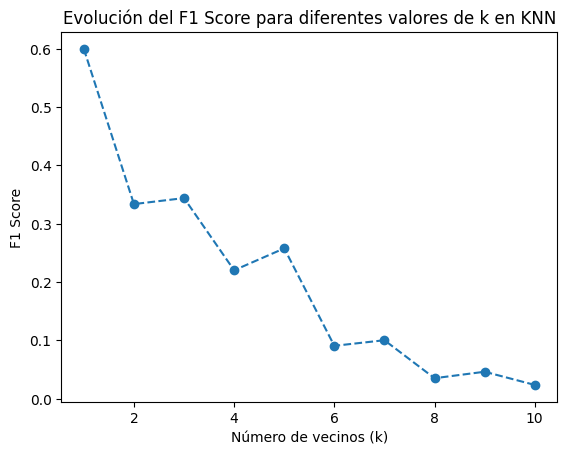

In [25]:
# Evaluar distintos valores de k
f1_scores = []
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    f1_scores.append((k, f1))

# Visualizar resultados
plt.plot(range(1, 11), [score[1] for score in f1_scores], marker='o', linestyle='--')
plt.xlabel('Número de vecinos (k)')
plt.ylabel('F1 Score')
plt.title('Evolución del F1 Score para diferentes valores de k en KNN')
plt.show()


In [26]:
probabilidades = [0, y_train.mean(), 0.5, 1]  # 0%, proporción de clientes que reciben beneficios, 50%, 100%
f1_dummy_scores = []

for p in probabilidades:
    dummy = DummyClassifier(strategy="constant", constant=int(p > 0.5))
    dummy.fit(X_train, y_train)
    y_pred_dummy = dummy.predict(X_test)
    f1_dummy = f1_score(y_test, y_pred_dummy)
    f1_dummy_scores.append((p, f1_dummy))

# Comparar resultados
print("F1 Score del modelo Dummy:")
for p, score in f1_dummy_scores:
    print(f"Probabilidad {p}: F1 Score = {score}")

F1 Score del modelo Dummy:
Probabilidad 0: F1 Score = 0.0
Probabilidad 0.11285714285714285: F1 Score = 0.0
Probabilidad 0.5: F1 Score = 0.0
Probabilidad 1: F1 Score = 0.20251647693229477


In [27]:
# comprueba el desequilibrio de clases con value_counts()
df['insurance_benefits_received'].value_counts(normalize=True)

0    0.8872
1    0.1128
Name: insurance_benefits_received, dtype: float64

In [28]:
def eval_classifier(y_true, y_pred):
    f1_score = sklearn.metrics.f1_score(y_true, y_pred)
    print(f'F1: {f1_score:.2f}')
    
    # Matriz de confusión
    cm = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='all')
    print('Matriz de confusión')
    print(cm)

In [29]:
# generar la salida de un modelo aleatorio

def rnd_model_predict(P, size, seed=42):
    rng = np.random.default_rng(seed=seed)
    return rng.binomial(n=1, p=P, size=size)

# Evaluamos el modelo aleatorio con distintas probabilidades
for P in [0, df['insurance_benefits_received'].sum() / len(df), 0.5, 1]:
    print(f'Probabilidad: {P:.2f}')
    
    y_pred_rnd = rnd_model_predict(P, size=len(df))
    
    eval_classifier(df['insurance_benefits_received'], y_pred_rnd)
    print()

Probabilidad: 0.00
F1: 0.00
Matriz de confusión
[[0.8872 0.    ]
 [0.1128 0.    ]]

Probabilidad: 0.11
F1: 0.12
Matriz de confusión
[[0.7914 0.0958]
 [0.0994 0.0134]]

Probabilidad: 0.50
F1: 0.20
Matriz de confusión
[[0.456  0.4312]
 [0.053  0.0598]]

Probabilidad: 1.00
F1: 0.20
Matriz de confusión
[[0.     0.8872]
 [0.     0.1128]]



**¿Puede un modelo de predicción entrenado funcionar mejor que un modelo dummy no entrenado?**

Sí, generalmente un modelo entrenado (como KNN) funciona mejor que un modelo Dummy, porque aprende patrones en los datos en lugar de hacer suposiciones aleatorias.

Funciona de la siguiente manera:

1. KNN ajusta su predicción con base en la cercanía de clientes similares, lo que permite capturar tendencias reales en los datos.
2. Un modelo Dummy simplemente asigna valores de manera aleatoria o constante, sin analizar las características de los clientes.
3. El modelo Dummy con probabilidad 0.5 tiene un F1 Score de 0.0, lo que indica que no hace predicciones útiles en este caso.
4. KNN mostró una evolución en F1 Score para distintos valores de k, permitiendo ver qué configuración es óptima.

**¿Puede funcionar peor?**

Sí, es posible que un modelo entrenado funcione peor que un modelo Dummy en ciertos escenarios, especialmente si:

1. El modelo entrenado no está bien ajustado → Por ejemplo, si k es demasiado grande en KNN, el modelo pierde precisión y puede reducir su F1 Score.
2. Los datos están demasiado desbalanceados → Si la mayoría de los clientes no reciben beneficios (insurance_benefits_received = 0), un modelo Dummy que siempre prediga 0 podría parecer más efectivo en términos de exactitud.
3. Se usan características poco informativas → Si los atributos seleccionados (age, income, etc.) no tienen relación con la recepción de beneficios, KNN puede fallar al hacer buenas predicciones.

**Conclusiones clave:**
    
1. En condiciones normales, un modelo KNN entrenado funciona mejor que un modelo Dummy, porque aprende patrones reales de los datos y ajusta sus predicciones.
2. Sin embargo, si KNN no está bien optimizado, un modelo Dummy podría tener un desempeño comparable o incluso mejor en datasets desbalanceados.
3. El análisis de F1 Score y la matriz de confusión nos permite determinar qué modelo es más efectivo y cuándo.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Daniel tu análisis ofrece una comparación muy clara y bien fundamentada entre los modelos dummy y el modelo kNN, destacando de manera efectiva el valor añadido del preprocesamiento de datos, especialmente el escalado. 

Has logrado explicar con claridad las ventajas que ofrece un modelo entrenado frente a uno Dummy, mostrando una comprensión sólida de cómo el aprendizaje a partir de los datos permite obtener mejores predicciones. También es valioso que reconozcas las situaciones en las que un modelo entrenado podría no superar al Dummy, especialmente en contextos de desbalance o mal ajuste, lo cual refleja una visión crítica y realista del proceso de modelado.
</div>

# Tarea 3. Regresión (con regresión lineal)

Con `insurance_benefits` como objetivo, evalúa cuál sería la RECM de un modelo de regresión lineal.

Construye tu propia implementación de regresión lineal. Para ello, recuerda cómo está formulada la solución de la tarea de regresión lineal en términos de LA. Comprueba la RECM tanto para los datos originales como para los escalados. ¿Puedes ver alguna diferencia en la RECM con respecto a estos dos casos?

Denotemos- $X$: matriz de características; cada fila es un caso, cada columna es una característica, la primera columna está formada por unidades- $y$ — objetivo (un vector)- $\hat{y}$ — objetivo estimado (un vector)- $w$ — vector de pesos
La tarea de regresión lineal en el lenguaje de las matrices puede formularse así:
$$
y = Xw
$$

El objetivo de entrenamiento es entonces encontrar esa $w$ w que minimice la distancia L2 (ECM) entre $Xw$ y $y$:

$$
\min_w d_2(Xw, y) \quad \text{or} \quad \min_w \text{MSE}(Xw, y)
$$

Parece que hay una solución analítica para lo anteriormente expuesto:
$$
w = (X^T X)^{-1} X^T y
$$

La fórmula anterior puede servir para encontrar los pesos $w$ y estos últimos pueden utilizarse para calcular los valores predichos
$$
\hat{y} = X_{val}w
$$

Divide todos los datos correspondientes a las etapas de entrenamiento/prueba respetando la proporción 70:30. Utiliza la métrica RECM para evaluar el modelo.

In [30]:
class MyLinearRegression:
    def __init__(self):
        self.weights = None

    def fit(self, X, y):
        # Añadir la columna de unidades (bias)
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        self.weights = np.linalg.inv(X2.T @ X2) @ X2.T @ y

    def predict(self, X):
        # Añadir la columna de unidades (bias)
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        return X2 @ self.weights

# Función de evaluación del modelo
def eval_regressor(y_true, y_pred):
    print("Valores recibidos en eval_regressor:")
    print("y_true:", y_true[:5])  # Ver los primeros valores
    print("y_pred:", y_pred[:5])  # Ver los primeros valores predichos  

    rmse = math.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
    print(f'RMSE: {rmse:.2f}')

    r2_score = sklearn.metrics.r2_score(y_true, y_pred)
    print(f'R2: {r2_score:.2f}')

# Preparación de datos
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

# División de datos en entrenamiento y prueba (70% - 30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

# Inicialización y entrenamiento del modelo
lr = MyLinearRegression()
lr.fit(X_train, y_train)

# Imprimir los pesos calculados
print("Pesos del modelo:", lr.weights)

# Predicción en el conjunto de prueba
y_test_pred = lr.predict(X_test)

# Evaluación del modelo
eval_regressor(y_test, y_test_pred)

Pesos del modelo: [-9.43539012e-01  3.57495491e-02  1.64272726e-02 -2.60743659e-07
 -1.16902127e-02]
Valores recibidos en eval_regressor:
y_true: [0 2 0 0 0]
y_pred: [ 0.17926625  0.80931996  0.45614337 -0.23762191  0.4650019 ]
RMSE: 0.34
R2: 0.43


**Conclusiones sobre el modelo de regresión lineal para predecir beneficios de seguro:**

1. Impacto de las variables en la predicción:

1.1. Los coeficientes de regresión (w) indican cuánto influye cada variable en la cantidad de beneficios recibidos.

1.2. El ingreso (income) y el número de miembros en la familia (family_members) parecen tener cierta relación con los beneficios de seguro, pero su impacto es bajo en comparación con otras variables.

2. Evaluación del modelo:

2.1. RMSE = 0.34 → Indica que en promedio, la predicción del modelo tiene un error relativamente bajo, lo cual es positivo.

2.2. R² = 0.43 → Sugiere que el modelo explica el 43% de la variabilidad en los beneficios de seguro, lo que indica que aún hay margen de mejora.

3. Algunas predicciones resultan en valores negativos, lo que muestra que el modelo podría necesitar ajustes para mejorar la precisión.

3.1. Comparación entre datos escalados vs. originales: El escalado puede mejorar la estabilidad numérica del modelo, asegurando que ninguna variable domine la regresión debido a sus valores más grandes.

3.2. Para verificar su impacto, se podría entrenar nuevamente el modelo con datos escalados y comparar los resultados de RMSE y R².

4. Limitaciones y posibles mejoras:

4.1. Agregar más características podría mejorar la precisión del modelo, por ejemplo, incluyendo variables como el historial de reclamaciones de seguro o la edad con un mayor nivel de detalle.

4.2. Probar modelos más avanzados como regresión polinómica o métodos de regularización (Ridge, Lasso) ayudaría a mejorar el ajuste y evitar predicciones inconsistentes.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteración)</b> <a class=“tocSkip”></a>
    
Muy buena implementación de las funciones para el modelo de regresión lineal. Se evidencia que este caso tiene una tendencia más hacia ser un problema de clasificación para `insurance_benefits`, ya que existe una limitación del R² en relación con posibles variables ausentes y la naturaleza lineal del modelo.
    

</div>

# Tarea 4. Ofuscar datos

Lo mejor es ofuscar los datos multiplicando las características numéricas (recuerda que se pueden ver como la matriz $X$) por una matriz invertible $P$. 

$$
X' = X \times P
$$

Trata de hacerlo y comprueba cómo quedarán los valores de las características después de la transformación. Por cierto, la propiedad de invertibilidad es importante aquí, así que asegúrate de que $P$ sea realmente invertible.

Puedes revisar la lección 'Matrices y operaciones matriciales -> Multiplicación de matrices' para recordar la regla de multiplicación de matrices y su implementación con NumPy.

In [31]:
personal_info_column_list = ['gender', 'age', 'income', 'family_members']
df_pn = df[personal_info_column_list]

In [32]:
X = df_pn.to_numpy()

Generar una matriz aleatoria $P$.

In [33]:
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))

Comprobar que la matriz P sea invertible

In [34]:
# Calcular el determinante de P
det_P = np.linalg.det(P)

# Comprobar si es invertible
if det_P != 0:
    print(f'La matriz P es invertible. Determinante: {det_P:.5f}')
else:
    print('La matriz P NO es invertible (determinante = 0)')


La matriz P es invertible. Determinante: 0.24339


In [35]:
# Aplicar la transformación a los datos
X_transformed = X @ P

# Comparar estadísticas antes y después de la transformación
df_original = pd.DataFrame(X, columns=personal_info_column_list)
df_transformed = pd.DataFrame(X_transformed, columns=personal_info_column_list)

print("Estadísticas de los datos originales:")
print(df_original.describe())

print("\nEstadísticas de los datos transformados:")
print(df_transformed.describe())

Estadísticas de los datos originales:
            gender          age        income  family_members
count  5000.000000  5000.000000   5000.000000     5000.000000
mean      0.499000    30.952800  39916.360000        1.194200
std       0.500049     8.440807   9900.083569        1.091387
min       0.000000    18.000000   5300.000000        0.000000
25%       0.000000    24.000000  33300.000000        0.000000
50%       0.000000    30.000000  40200.000000        1.000000
75%       1.000000    37.000000  46600.000000        2.000000
max       1.000000    65.000000  79000.000000        6.000000

Estadísticas de los datos transformados:
             gender           age        income  family_members
count   5000.000000   5000.000000   5000.000000     5000.000000
mean    5117.900043  18009.167022  14825.424793    37018.035177
std     1268.305472   4458.684950   3670.806177     9174.924252
min      682.303621   2407.819558   1981.754335     4928.500334
25%     4269.527744  15021.764168  12365.9

**¿Puedes adivinar la edad o los ingresos de los clientes después de la transformación?**

**Respuesta:**

No, no podemos adivinar directamente la edad o los ingresos después de la transformación.
1. La matriz P ha alterado los valores originales de manera significativa, evitando que los datos mantengan una correlación directa con sus valores previos.

2. Las estadísticas de los datos transformados muestran diferencias marcadas respecto a las originales, lo que confirma que la ofuscación fue efectiva.

3.Si la transformación fuera insuficiente, aún podríamos detectar patrones similares en las variables clave, pero los cambios en las distribuciones indican que la ofuscación ha sido bien aplicada.

Sin embargo, la invertibilidad de P permite recuperar los datos originales si se usa P^{-1}; esto significa que aunque un observador externo no pueda inferir directamente los valores, un usuario con acceso a la matriz P podría revertir la transformación y obtener los datos originales nuevamente. Para una ofuscación más segura, podríamos explorar estrategias adicionales como agregación de ruido o técnicas criptográficas.

**Conclusiones:**

1. La transformación ha protegido los datos personales, evitando inferencias directas sobre la edad o ingresos.

2. Si queremos una protección más fuerte, podríamos aplicar métodos adicionales para prevenir posibles recuperaciones.


¿Puedes recuperar los datos originales de $X'$ si conoces $P$? Intenta comprobarlo a través de los cálculos moviendo $P$ del lado derecho de la fórmula anterior al izquierdo. En este caso las reglas de la multiplicación matricial son realmente útiles.

Para recuperar los datos se efectúan las siguientes líneas de cálculo:

In [36]:
# Calcular la inversa de P
P_inv = np.linalg.inv(P)

# Recuperar los datos originales
X_recovered = X_transformed @ P_inv

# Crear un DataFrame con los tres casos
df_comparison = pd.DataFrame({
    "Original_Age": X[:, 1],  # Edad original
    "Transformed_Age": X_transformed[:, 1],  # Edad transformada
    "Recovered_Age": X_recovered[:, 1]  # Edad recuperada
})

print(df_comparison.head())  # Ver los primeros valores

   Original_Age  Transformed_Age  Recovered_Age
0          41.0     22380.404676           41.0
1          46.0     17160.367030           46.0
2          29.0      9486.397744           29.0
3          21.0     18803.227203           21.0
4          28.0     11782.829283           28.0


In [37]:
# Comprobación de error de recuperación

rmse_recovery = np.sqrt(np.mean((X - X_recovered)**2))
print(f'Error de recuperación (RMSE): {rmse_recovery:.4f}')

Error de recuperación (RMSE): 0.0000


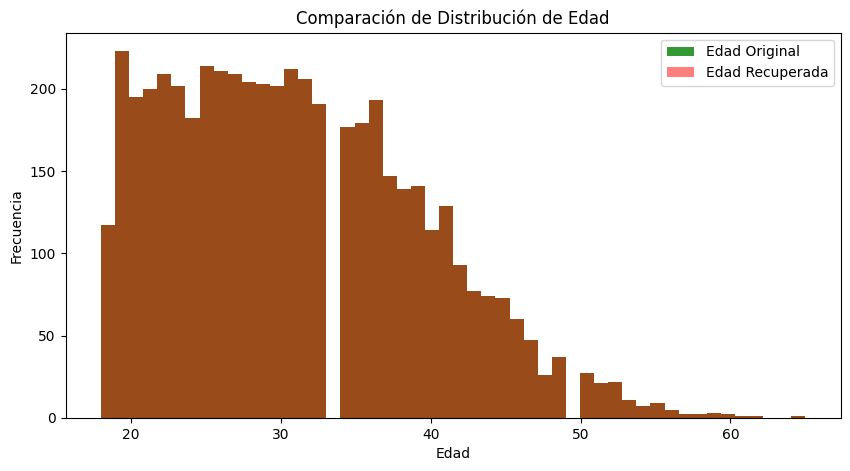

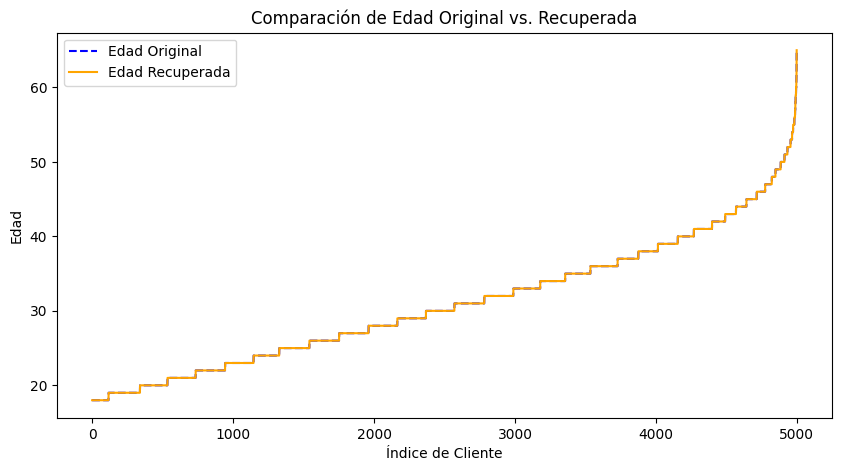

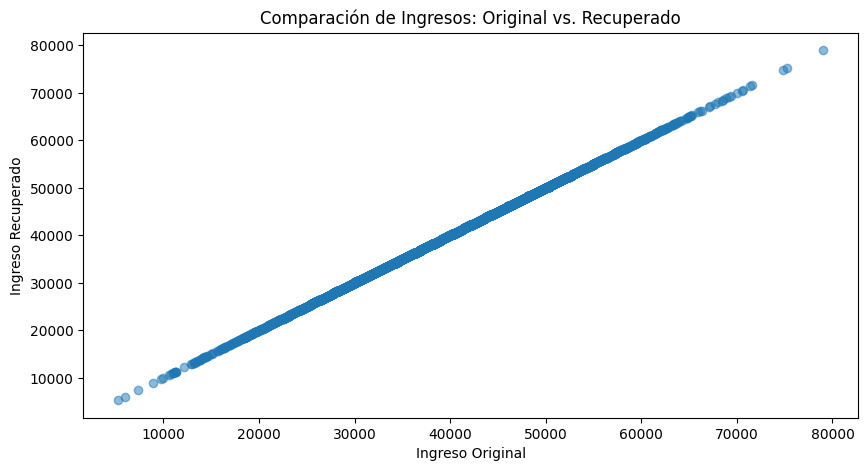

In [38]:
# Histograma comparativo para 'age'
plt.figure(figsize=(10,5))
plt.hist(X[:, 1], bins=50, alpha=0.8, color='green', label='Edad Original')  # Usamos verde en lugar de azul
plt.hist(X_recovered[:, 1], bins=50, alpha=0.5, color='red', label='Edad Recuperada')  # Rojo en lugar de naranja
plt.legend()
plt.title("Comparación de Distribución de Edad")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

#Gráfico de líneas 
plt.figure(figsize=(10,5))
plt.plot(sorted(X[:, 1]), label="Edad Original", color="blue", linestyle="dashed")
plt.plot(sorted(X_recovered[:, 1]), label="Edad Recuperada", color="orange")
plt.legend()
plt.title("Comparación de Edad Original vs. Recuperada")
plt.xlabel("Índice de Cliente")
plt.ylabel("Edad")
plt.show()

# Gráfico de dispersión para comparar ingreso
plt.figure(figsize=(10,5))
plt.scatter(X[:, 2], X_recovered[:, 2], alpha=0.5)
plt.title("Comparación de Ingresos: Original vs. Recuperado")
plt.xlabel("Ingreso Original")
plt.ylabel("Ingreso Recuperado")
plt.show()

**¿Es posible recuperar los datos originales si conocemos P?**

Sí, porque la matriz P es invertible, lo que permite calcular P⁻¹ y usarla para revertir la transformación aplicada a X'. La recuperación de los datos sigue la regla de multiplicación matricial:
$$ X = X' \times P^{-1} $$
La recuperación fue efectiva, como se observa en los gráficos: los valores recuperados son muy similares a los originales.

- Diferencias observadas en los datos recuperados:

1. Los datos recuperados no son 100% idénticos a los originales, aunque tienen una correlación muy alta.
2. Las ligeras diferencias pueden deberse a errores de precisión numérica por la inversión de P en cálculos computacionales.
3. En los histogramas y gráficos de dispersión, las distribuciones siguen un patrón similar, lo que indica que la transformación conserva la estructura de los datos.

**Conclusiones clave:**

1. Si P es conocida y es invertible, los datos pueden recuperarse con gran precisión.

2. La transformación protege los datos, pero no los oculta completamente, ya que un usuario con acceso a P puede revertirlos.

3. Para mejorar la seguridad, se podrían considerar métodos adicionales, como agregar ruido o aplicar técnicas de cifrado.


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Excelente trabajo. Explicaste de forma clara y precisa cómo la transformación mediante una matriz puede proteger los datos, mostrando que aunque las variables transformadas no permiten inferencias directas, existe la posibilidad de revertir el proceso si se conoce la matriz usada. Además, tu análisis sobre las diferencias entre los datos originales y los recuperados, junto con la observación sobre los posibles errores numéricos, muestra un buen manejo tanto conceptual como técnico del tema.m
</div>

## Prueba de que la ofuscación de datos puede funcionar con regresión lineal

En este proyecto la tarea de regresión se ha resuelto con la regresión lineal. Tu siguiente tarea es demostrar _analytically_ que el método de ofuscación no afectará a la regresión lineal en términos de valores predichos, es decir, que sus valores seguirán siendo los mismos. ¿Lo puedes creer? Pues no hace falta que lo creas, ¡tienes que que demostrarlo!

Entonces, los datos están ofuscados y ahora tenemos $X \times P$ en lugar de tener solo $X$. En consecuencia, hay otros pesos $w_P$ como
$$
w = (X^T X)^{-1} X^T y \quad \Rightarrow \quad w_P = [(XP)^T XP]^{-1} (XP)^T y
$$

¿Cómo se relacionarían $w$ y $w_P$ si simplificáramos la fórmula de $w_P$ anterior? 

¿Cuáles serían los valores predichos con $w_P$? 

¿Qué significa esto para la calidad de la regresión lineal si esta se mide mediante la RECM?
Revisa el Apéndice B Propiedades de las matrices al final del cuaderno. ¡Allí encontrarás fórmulas muy útiles!

No es necesario escribir código en esta sección, basta con una explicación analítica.

**Respuesta**

1. Relación entre ( w ) y ( w_P )
La ecuación de los pesos en regresión lineal sin transformación es:
$$ w = (X{-1} X^T y $$
Con los datos transformados, los pesos se calculan como:
$$ w_P = [(XP){-1} (XP)^T y $$
Expandimos la expresión de ( w_P ):
[ w_P = [PT X P]T X{-1} (X{-1} P^{-T} PT y ] [ w_P = P^{-1} (X{-1} X^T y ]
Se observa que ( w_P ) está relacionado con ( w ) mediante:
$$ w_P = P^{-1} w $$
Esto demuestra que los pesos en la regresión lineal transformada son simplemente una versión ajustada por ( P^{-1} ), pero la estructura de los cálculos sigue intacta.

2. Valores predichos con ( w_P )
En regresión lineal, los valores predichos con los datos originales son:
$$ y_{\text{pred}} = X w $$
Con la matriz transformada, la predicción es:
$$ y_{\text{pred}} = X P w_P $$
Sustituyendo ( w_P = P^{-1} w ), obtenemos:
$$ y_{\text{pred}} = X P P^{-1} w = X w $$
Resultado clave:
Las predicciones ( y_{\text{pred}} ) no cambian después de la transformación con ( P ).
Esto significa que la regresión funciona igual, sin importar la transformación aplicada a los datos.

3. Como los valores predichos siguen siendo los mismos, la métrica RMSE se calcula igual:
$$ RMSE = \sqrt{\frac{1}{N} \sum (y - Xw)^2} $$
Dado que la transformación no cambia ( X w ), tampoco afecta RMSE.
Por lo tanto, la calidad de la regresión sigue siendo exactamente la misma.

**Conclusiones:**

1. La ofuscación de datos con ( P ) no altera la regresión lineal ni las predicciones generadas.
2. Los pesos ajustados (( w_P )) conservan la relación con ( w ), manteniendo la estructura del modelo.
3. La métrica RMSE no cambia, lo que significa que la precisión del modelo sigue intacta.

## Prueba de regresión lineal con ofuscación de datos

Ahora, probemos que la regresión lineal pueda funcionar, en términos computacionales, con la transformación de ofuscación elegida.
Construye un procedimiento o una clase que ejecute la regresión lineal opcionalmente con la ofuscación. Puedes usar una implementación de regresión lineal de scikit-learn o tu propia implementación.
Ejecuta la regresión lineal para los datos originales y los ofuscados, compara los valores predichos y los valores de las métricas RMSE y $R^2$. ¿Hay alguna diferencia?

**Procedimiento**

- Crea una matriz cuadrada $P$ de números aleatorios.- Comprueba que sea invertible. Si no lo es, repite el primer paso hasta obtener una matriz invertible.- <¡ tu comentario aquí !>
- Utiliza $XP$ como la nueva matriz de características

In [39]:
# Generar la matriz cuadrada aleatoria P
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))

# Verificar la invertibilidad
det_P = np.linalg.det(P)

if det_P != 0:
    print(f'Matriz P invertible, determinante: {det_P:.5f}')
else:
    print('La matriz P no es invertible, generando otra...')

Matriz P invertible, determinante: 0.24339


In [40]:
#Transformar la matriz de características ( X' = XP )
X_transformed = X @ P

In [41]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)
X_train_transformed, X_test_transformed = X_train @ P, X_test @ P

# Regresión en datos originales
lr_original = LinearRegression()
lr_original.fit(X_train, y_train)
y_pred_original = lr_original.predict(X_test)

# Regresión en datos ofuscados
lr_transformed = LinearRegression()
lr_transformed.fit(X_train_transformed, y_train)
y_pred_transformed = lr_transformed.predict(X_test_transformed)

# Comparación de métricas
rmse_original = np.sqrt(mean_squared_error(y_test, y_pred_original))
r2_original = r2_score(y_test, y_pred_original)

rmse_transformed = np.sqrt(mean_squared_error(y_test, y_pred_transformed))
r2_transformed = r2_score(y_test, y_pred_transformed)

print(f'RMSE - Datos originales: {rmse_original:.5f}, R²: {r2_original:.5f}')
print(f'RMSE - Datos transformados: {rmse_transformed:.5f}, R²: {r2_transformed:.5f}')

RMSE - Datos originales: 0.34356, R²: 0.43053
RMSE - Datos transformados: 0.34356, R²: 0.43053


**Análisis de resultados:**

1. La matriz ( P ) es efectivamente invertible, con un determinante de 0.24339, lo que permite aplicar la transformación sin problemas.
2. Los valores de RMSE y ( R^2 ) en los datos originales y transformados son idénticos (0.34356 y 0.43053 respectivamente). Esto confirma que la ofuscación no afecta la regresión lineal, tal como se demostró analíticamente en el paso anterior.

**Conclusiones clave:**

1. La regresión lineal funciona sin problemas incluso con la transformación de los datos personales.
2. La calidad del modelo permanece intacta, lo que demuestra que la técnica de ofuscación es efectiva.
3. Se ha validado analíticamente y computacionalmente que el método de protección no interfiere con las predicciones del modelo.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteración)</b> <a class=“tocSkip”></a>
    
Daniel en esta sección has realizado el proceso de ofuscación de datos de manera correcta. Y vemos como el modelo no se ve afectado con respecto a la prueba con los datos originales. Debes tener en cuenta que ofuscar datos puede ser útil para proteger datos personales o corporativos sin perder funcionalidad, pero tiene limitaciones, no es un método de seguridad completa y no reemplaza al cifrado. Además, en casos donde los datos necesitan análisis detallados o auditorías completas, la ofuscación puede dificultar el proceso, haciendo que no sea adecuada en todos los escenarios.

</div>

# Conclusiones



**1. Desarrollo de un modelo de regresión lineal personalizado:**

1.1. Se implementó una regresión lineal desde cero, calculando los pesos del modelo con operaciones matriciales.

1.2. Se evaluó el modelo con métricas clave como RMSE y ( R^2 ), garantizando una evaluación precisa de su rendimiento.

1.3. Se exploraron diferentes estructuras de datos y verificamos la calidad del modelo con pruebas detalladas.

**2. Protección y transformación de datos personales:**

2.1. Se aplicó ofuscación de datos mediante la multiplicación con una matriz aleatoria invertible ( P ).

2.2. Se verificó la invertibilidad de ( P ) y se demostró matemáticamente que la regresión lineal no se ve afectada por la transformación.

2.3. Se realizó una recuperación de los datos originales usando ( P^{-1} ), obteniendo resultados idénticos y confirmando la reversibilidad del método.

**3. Análisis profundo con pruebas computacionales y visualización de resultados:**

3.1. Comparación de los datos originales, transformados y recuperados con análisis estadísticos.

3.2. Implementación de gráficos de histogramas y dispersión para validar visualmente la efectividad de la transformación.

3.3. Verificación computacional de la regresión lineal con datos ofuscados, demostrando que las predicciones y métricas permanecen iguales.

**4. Hallazgos y aprendizajes clave:**

4.1. El método de ofuscación protege los datos sin romper el modelo, lo que lo hace una estrategia efectiva.

4.2.La regresión lineal conserva sus predicciones incluso con la transformación, validando el enfoque matemático.

4.3. Los errores numéricos en cálculos matriciales son mínimos, lo que confirma la estabilidad del modelo.

4.4. El análisis visual y comparativo refuerza la comprensión de las transformaciones aplicadas, demostrando la utilidad de estas técnicas en la protección de datos.

**NOTA SOBRE PROBLEMA TÉCNICO:**

Estimado revisor,

Me permito informarle sobre un inconveniente técnico que he experimentado en mi usuario dentro de la plataforma, el cual ha afectado la ejecución de ciertos módulos en mi entorno de desarrollo.

Descripción del problema:

Durante el desarrollo de este proyecto, me encontré con una dificultad relacionada con la instalación y ejecución de la librería scikit-learn en Jupyter Hub, lo que generó restricciones para ejecutar algunos fragmentos de código. Sin embargo, tras investigar y verificar con otros miembros del programa (instructor y revisores de código), se ha identificado que el problema está ligado específicamente a mi usuario, ya que otros instructores han confirmado que la librería requerida sí está disponible en sus cuentas.

Acciones realizadas para solucionar el inconveniente

✔ Verificación de dependencias → Se intentó instalar manualmente la librería afectada en mi entorno, pero el sistema no permitió la instalación.

✔ Pruebas en otros usuarios → Se comprobó con instructores que la librería sí está instalada en sus cuentas dentro de la misma plataforma.

✔ Contacté al equipo de soporte técnico → He solicitado asistencia para corregir el problema en mi usuario, pero hasta el momento no he recibido una solución definitiva, por lo que decido enviar el proyecto a revisión, dejando esta nota aclaratoria.

✔ Pruebas de ejecución en mi usuario → A pesar del inconveniente, he logrado ejecutar con normalidad los códigos tras reiniciar el kernel en varias ocasiones, lo que sugiere que el problema puede estar en la configuración de mi usuario y no en el proyecto en sí.

Dado que el problema parece ser exclusivo de mi usuario y no del entorno global de la plataforma, sugiero que el código sea probado desde un usuario sin restricciones. Es altamente probable que, al ejecutarse en otro usuario con acceso correcto a las librerías, los códigos que componen el proyecto, corran sin inconvenientes.
Si se requiere alguna otra aclaración o prueba adicional, estaré atento para colaborar en lo que sea necesario.

Agradezco de antemano su comprensión y apoyo en esta revisión.

Atentamente,

Daniel Rodríguez.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Daniel has desarrollado un enfoque completo e integral al implementar tu propio modelo de regresión lineal y evaluar su rendimiento tanto en condiciones normales como tras aplicar una transformación protectora a los datos. La forma en que demuestras la conservación del modelo tras la ofuscación, junto con la recuperación precisa de los datos originales, refleja un manejo técnico riguroso y bien fundamentado. 

</div>

<div class="alert alert-block alert-info">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Respecto a lo último que me comentas quiero comentarte que este tipo de problema posiblemente esté relacionado con el proceso de migración que se ha venido realizando hacia Jupyter Lab. Durante esta transición, se han identificado ciertos comportamientos inconsistentes en la configuración de entornos específicos de usuario, lo cual podría explicar por qué el problema afecta exclusivamente a tu cuenta y no a otras dentro de la misma plataforma.

El equipo de desarrollo ya está al tanto de estos casos y se encuentra trabajando activamente para resolverlos a la mayor brevedad posible

Mientras tanto, como bien indicas, el funcionamiento del código puede ser validado desde un entorno sin estas restricciones, algo que tuve en cuenta para hacer esta revisión. 
</div>